In [148]:
# install dependencies
import sys
# !{sys.executable} -m pip install pandas

In [149]:
# import dependencies
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

import warnings
from sklearn.model_selection import GridSearchCV
from sklearn_evaluation import plot

#### Exploratory Data Analysis

In [150]:
##### data loading and feature extraction

dataset_1_path = './datasets/project3_dataset1.txt'
dataset_1 = pd.read_csv(dataset_1_path,sep='\t',header=None)
num_columns = len(dataset_1.columns)
num_features = num_columns - 1
dataset_1.columns=["F"+str(i) for i in range(1, num_columns + 1)]
label_column = "F{0}".format(num_columns)
dataset_1_features = dataset_1.loc[:, dataset_1.columns != label_column]
dataset_1_label = dataset_1.loc[:, dataset_1.columns == label_column]



dataset_2_path = './datasets/project3_dataset2.txt'
# load the CSV file as a dataframe
dataset_2 = pd.read_csv(dataset_2_path,sep='\t',header=None)
num_columns = len(dataset_2.columns)
num_features = num_columns - 1
dataset_2.columns=["F"+str(i) for i in range(1, num_columns + 1)]
label_column = "F{0}".format(num_columns)
custom_encoding = {'Present':1, 'Absent':0}
dataset_2["F5"] = dataset_2["F5"].map(custom_encoding)
dataset_2_features = dataset_2.loc[:, dataset_2.columns != label_column]
dataset_2_label = dataset_2.loc[:, dataset_2.columns == label_column]


In [151]:
X, Y = dataset_1_features, dataset_1_label

In [152]:
X2, Y2 = dataset_2_features, dataset_2_label

#### Hyperparameter Tuning Models

In [153]:
def tune_svm(X,Y):
    svc = SVC()
    parameters = {'kernel':('linear', 'rbf'), 'C':[0.1,1, 10]}
    clf = GridSearchCV(svc, parameters, scoring='accuracy')
    clf.fit(X,Y.values.ravel())
    #cv_results = cross_validate(clf, X,Y.values.ravel(), cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)
    return clf

In [154]:
def tune_adaboost(X,Y):
    ada = AdaBoostClassifier(random_state=0)
    parameters = {'n_estimators': [100,200,300]}
    clf = GridSearchCV(ada, parameters, scoring='accuracy')
    clf = clf.fit(X, Y.values.ravel())
    #cv_results = cross_validate(clf, X,Y.values.ravel(), cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)
    return clf

In [155]:
def tune_logistic_regression(X,y, max_iter=100):
    logisticRegr = LogisticRegression(max_iter=max_iter)    
    scaler = preprocessing.StandardScaler().fit(X)
    x_scaled = scaler.transform(X)
    parameters={"C":np.logspace(-3,5,10)}
    clf = GridSearchCV(logisticRegr, parameters, scoring='accuracy', cv = 10)
    clf = clf.fit(x_scaled,y.values.ravel())
    return clf
    #cv_results = cross_validate(logisticRegr, x_scaled,y.values.ravel(), cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)

In [156]:
# TODO: Can I use the sklearn implementation? Or should I use the decision tree classifier to create custom random forest methodß
def tune_random_forest(X,y):
    param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
        }
    rf = RandomForestClassifier()
    clf = GridSearchCV(rf, param_grid, scoring='accuracy', cv = 10)
    clf = clf.fit(X,y.values.ravel())
    return clf

In [157]:
def tune_knn(X,y):
    
    scaler = preprocessing.StandardScaler().fit(X)
    x_scaled = scaler.transform(X)
    #x_scaled_test = scaler.transform(x_test)
    k_range = list(range(1, 31))
    param_grid = dict(n_neighbors=k_range)
    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, param_grid, scoring='accuracy', cv = 10)
    clf = clf.fit(x_scaled,y.values.ravel())
    return clf

In [158]:
def tune_decision_tree(X,y):
    params = {'max_leaf_nodes': list(range(2, 31)), 'min_samples_split': [2, 3, 4]}
    dt = tree.DecisionTreeClassifier()
    clf = GridSearchCV(dt, params, scoring='accuracy', cv = 10)
    clf = clf.fit(X,y)
    return clf

#### Dataset 1 Hyperparameter Tuning

In [91]:
svm_d1_clf = tune_svm(X,Y)
svm_d1_clf.best_params_

{'C': 1, 'kernel': 'linear'}

<AxesSubplot:title={'center':'Grid search results'}, xlabel='C', ylabel='Mean score'>

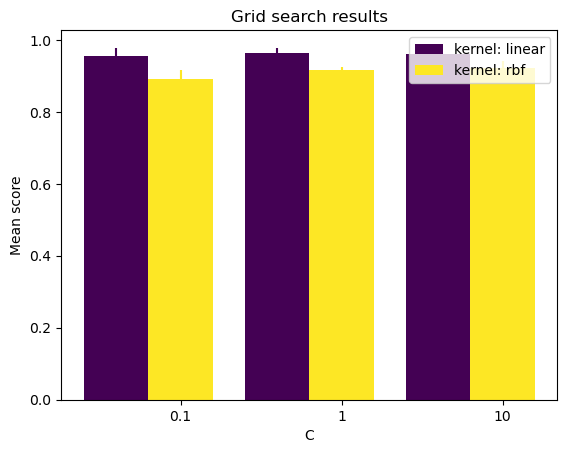

In [92]:
plot.grid_search(svm_d1_clf.cv_results_, change='C', kind='bar')

<AxesSubplot:title={'center':'Grid search results'}, xlabel='kernel', ylabel='Mean score'>

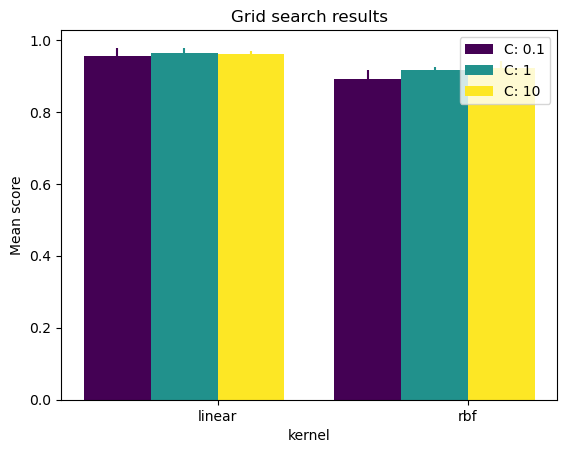

In [93]:
plot.grid_search(svm_d1_clf.cv_results_, change='kernel', kind='bar')

<AxesSubplot:>

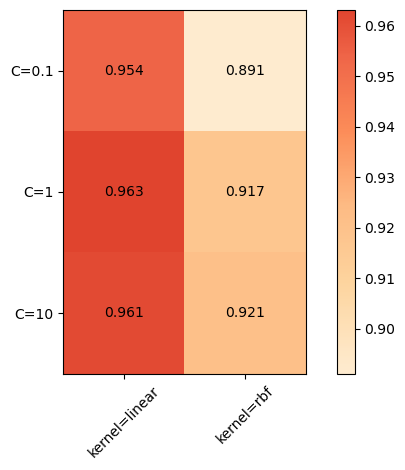

In [94]:
plot.grid_search(svm_d1_clf.cv_results_, change=('C', 'kernel'))

In [95]:
adaboost_d1_clf = tune_adaboost(X,Y)
adaboost_d1_clf.best_params_

{'n_estimators': 300}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Grid search results'}, xlabel='n_estimators', ylabel='Mean score'>

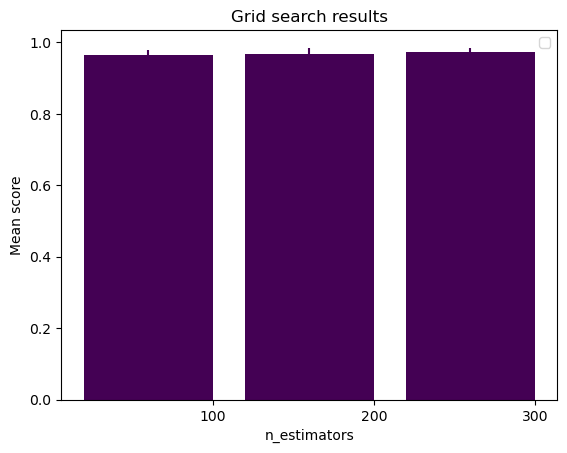

In [96]:
plot.grid_search(adaboost_d1_clf.cv_results_, change='n_estimators', kind='bar')

In [97]:
adaboost_d1_clf.cv_results_

{'mean_fit_time': array([0.15803232, 0.31335802, 0.46979699]),
 'std_fit_time': array([0.004167  , 0.003859  , 0.00325899]),
 'mean_score_time': array([0.00750241, 0.01410913, 0.02071962]),
 'std_score_time': array([0.00022843, 0.00013508, 0.00059125]),
 'param_n_estimators': masked_array(data=[100, 200, 300],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 200},
  {'n_estimators': 300}],
 'split0_test_score': array([0.97368421, 0.97368421, 0.97368421]),
 'split1_test_score': array([0.95614035, 0.95614035, 0.97368421]),
 'split2_test_score': array([0.97368421, 0.98245614, 0.98245614]),
 'split3_test_score': array([0.97368421, 0.98245614, 0.98245614]),
 'split4_test_score': array([0.9380531 , 0.9380531 , 0.94690265]),
 'mean_test_score': array([0.96304922, 0.96655799, 0.97183667]),
 'std_test_score': array([0.01422566, 0.01718919, 0.01306965]),
 'rank_test_score': array([3, 2, 1], dtype=i

In [98]:
warnings.filterwarnings('ignore')
lr_d1_clf = tune_logistic_regression(X,Y, max_iter=1000)
print(lr_d1_clf.best_params_)
warnings.filterwarnings('always')

{'C': 3.593813663804626}


In [99]:
lr_d1_clf

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-03, 7.74263683e-03, 5.99484250e-02, 4.64158883e-01,
       3.59381366e+00, 2.78255940e+01, 2.15443469e+02, 1.66810054e+03,
       1.29154967e+04, 1.00000000e+05])},
             scoring='accuracy')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0.4, 0, '0.4'),
 Text(1.4, 0, '1.4'),
 Text(2.4, 0, '2.4'),
 Text(3.4, 0, '3.4'),
 Text(4.4, 0, '4.4'),
 Text(5.4, 0, '5.4'),
 Text(6.4, 0, '6.4'),
 Text(7.4, 0, '7.4'),
 Text(8.4, 0, '8.4'),
 Text(9.4, 0, '9.4')]

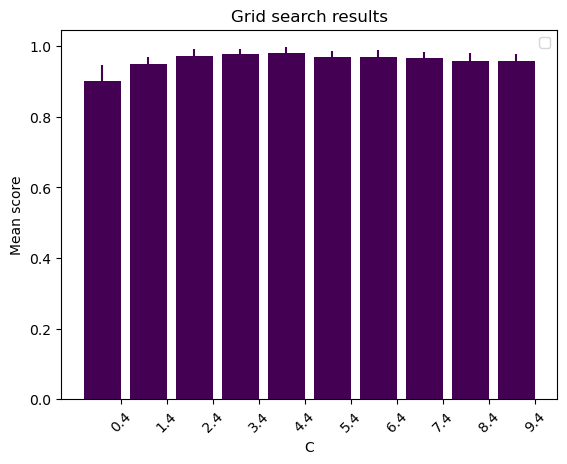

In [100]:
ax = plot.grid_search(lr_d1_clf.cv_results_, change='C', kind='bar')
ax.set_xticklabels(ax.get_xticks(), rotation = 45)

In [101]:
rf_d1_clf = tune_random_forest(X,Y)
rf_d1_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [102]:
rf_d1_clf

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='accuracy')

<AxesSubplot:>

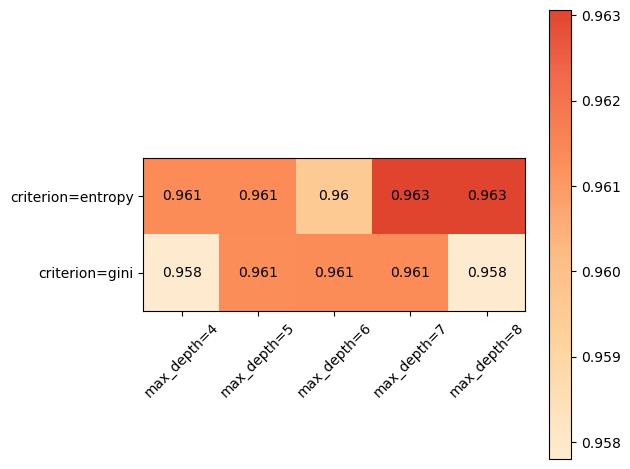

In [103]:
plot.grid_search(rf_d1_clf.cv_results_, change=('criterion', 'max_depth'), subset= {'max_features':'log2', 'n_estimators':200})

<AxesSubplot:>

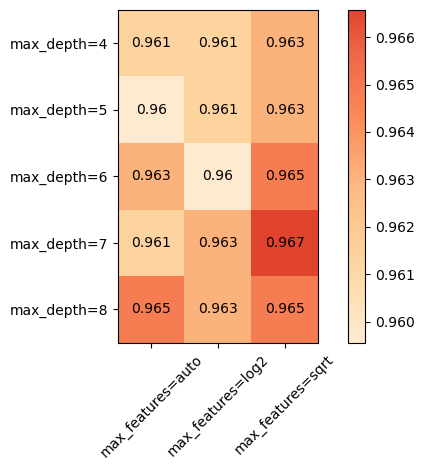

In [104]:
plot.grid_search(rf_d1_clf.cv_results_, change=('max_depth', 'max_features'), subset= {'criterion':'entropy', 'n_estimators':200})

<AxesSubplot:>

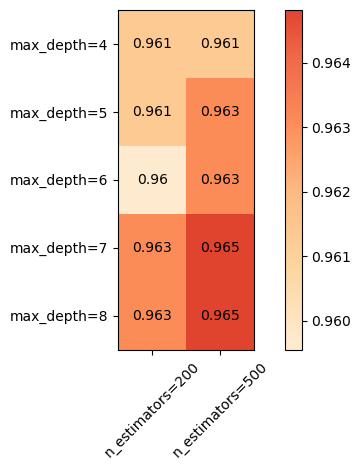

In [105]:
plot.grid_search(rf_d1_clf.cv_results_, change=('n_estimators', 'max_depth'), subset= {'criterion':'entropy', 'max_features':'log2'})

In [106]:
knn_d1_clf = tune_knn(X,Y)
knn_d1_clf.best_params_

{'n_neighbors': 11}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0.4, 0, '0.4'),
 Text(1.4, 0, '1.4'),
 Text(2.4, 0, '2.4'),
 Text(3.4, 0, '3.4'),
 Text(4.4, 0, '4.4'),
 Text(5.4, 0, '5.4'),
 Text(6.4, 0, '6.4'),
 Text(7.4, 0, '7.4'),
 Text(8.4, 0, '8.4'),
 Text(9.4, 0, '9.4'),
 Text(10.4, 0, '10.4'),
 Text(11.4, 0, '11.4'),
 Text(12.4, 0, '12.4'),
 Text(13.4, 0, '13.4'),
 Text(14.4, 0, '14.4'),
 Text(15.4, 0, '15.4'),
 Text(16.4, 0, '16.4'),
 Text(17.4, 0, '17.4'),
 Text(18.4, 0, '18.4'),
 Text(19.4, 0, '19.4'),
 Text(20.4, 0, '20.4'),
 Text(21.4, 0, '21.4'),
 Text(22.4, 0, '22.4'),
 Text(23.4, 0, '23.4'),
 Text(24.4, 0, '24.4'),
 Text(25.4, 0, '25.4'),
 Text(26.4, 0, '26.4'),
 Text(27.4, 0, '27.4'),
 Text(28.4, 0, '28.4'),
 Text(29.4, 0, '29.4')]

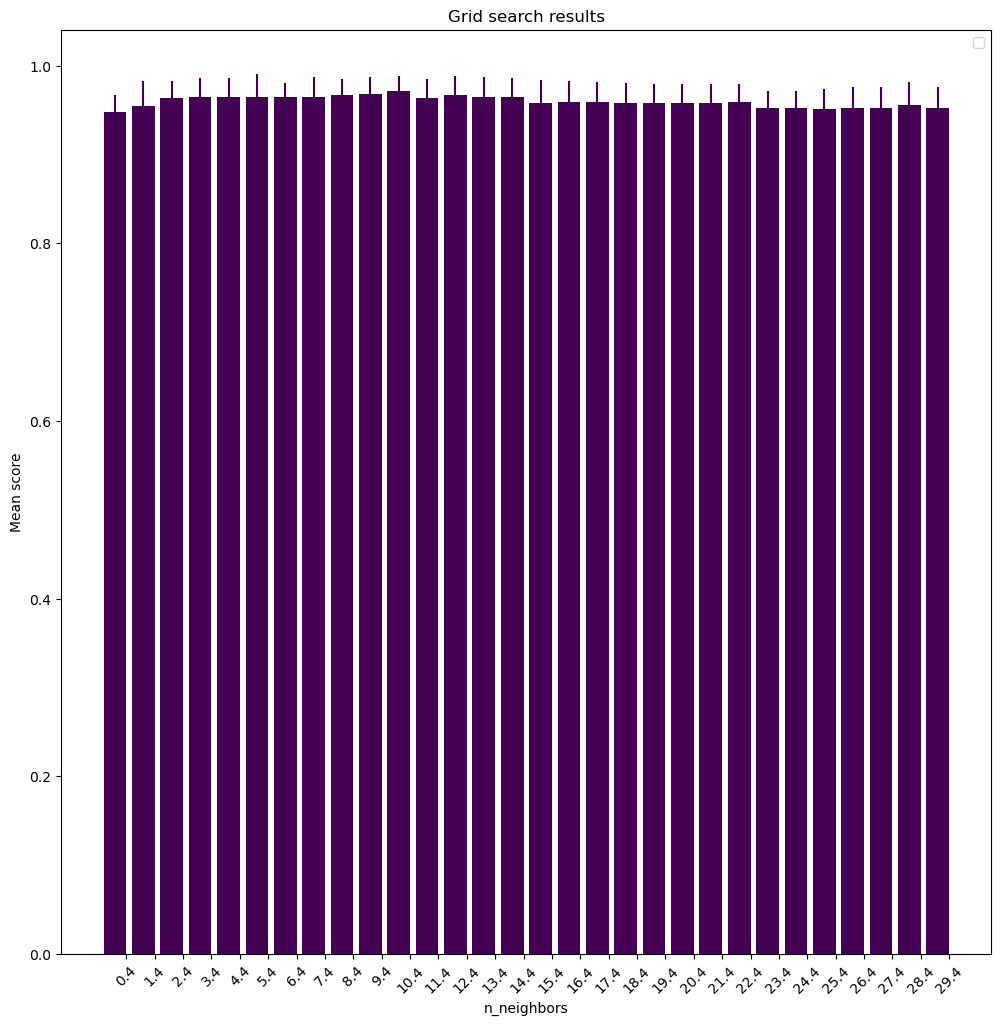

In [107]:
plt.figure(figsize=(12,12))
ax = plot.grid_search(knn_d1_clf.cv_results_, change='n_neighbors',kind='bar')
ax.set_xticklabels(ax.get_xticks(), rotation = 45)

In [108]:
dt_d1_clf = tune_decision_tree(X,Y)
dt_d1_clf.best_params_

{'max_leaf_nodes': 12, 'min_samples_split': 2}

<AxesSubplot:>

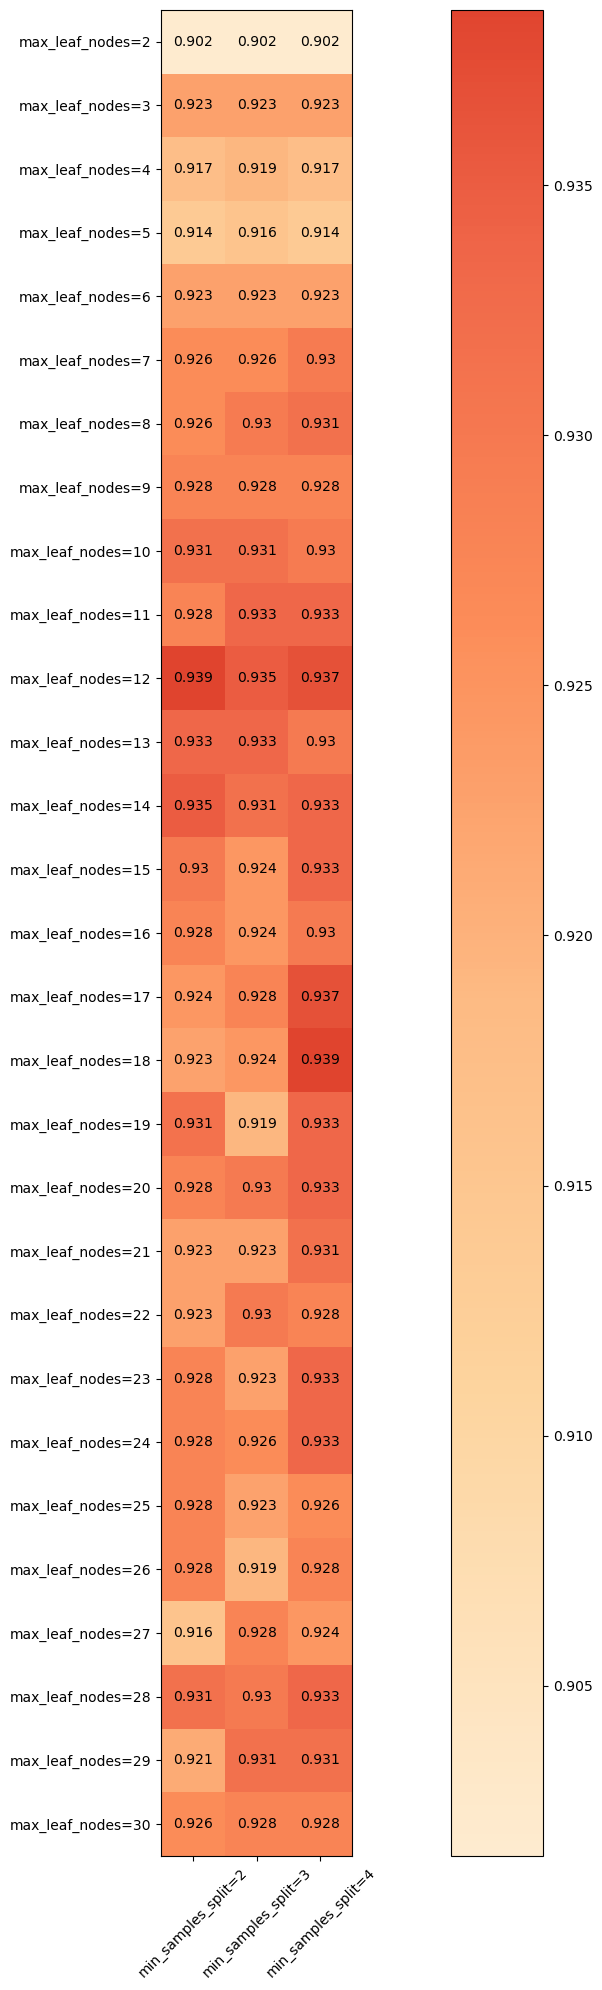

In [109]:
plt.figure(figsize=(20,20))
plot.grid_search(dt_d1_clf.cv_results_, change=('min_samples_split', 'max_leaf_nodes'))

#### Dataset 2 Hyperparameter Tuning

In [110]:
svm_d2_clf = tune_svm(X2,Y2)
svm_d2_clf.best_params_

{'C': 0.1, 'kernel': 'linear'}

<AxesSubplot:title={'center':'Grid search results'}, xlabel='C', ylabel='Mean score'>

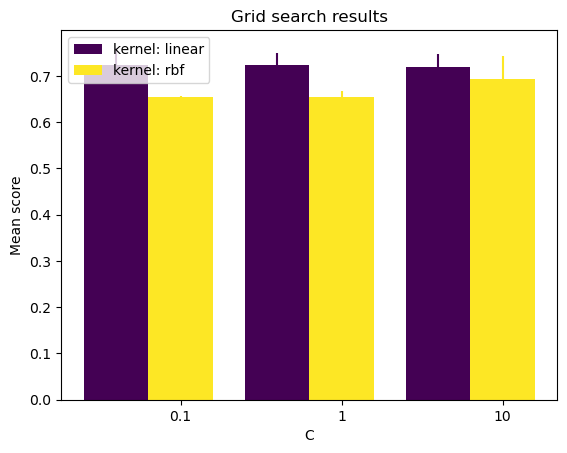

In [111]:
plot.grid_search(svm_d2_clf.cv_results_, change='C', kind='bar')

<AxesSubplot:title={'center':'Grid search results'}, xlabel='kernel', ylabel='Mean score'>

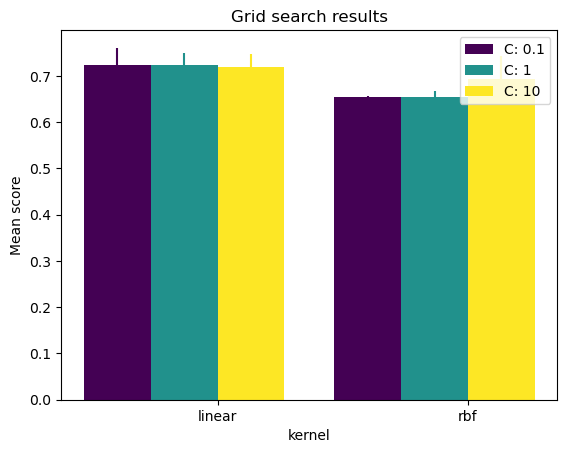

In [112]:
plot.grid_search(svm_d2_clf.cv_results_, change='kernel', kind='bar')

<AxesSubplot:>

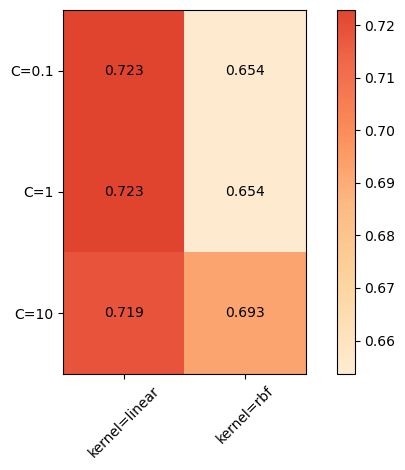

In [113]:
plot.grid_search(svm_d2_clf.cv_results_, change=('C', 'kernel'))

In [114]:
adaboost_d2_clf = tune_adaboost(X2,Y2)
adaboost_d2_clf.best_params_

{'n_estimators': 100}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Grid search results'}, xlabel='n_estimators', ylabel='Mean score'>

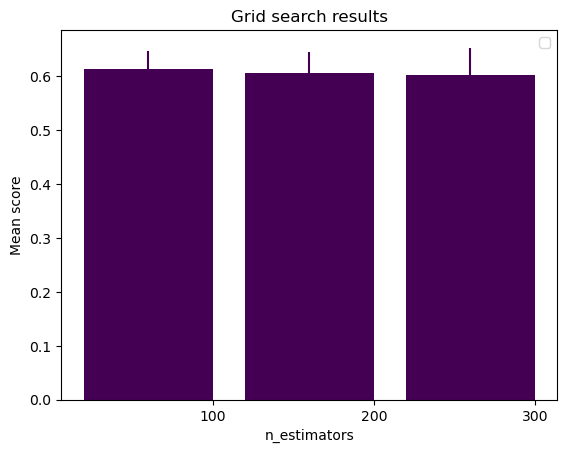

In [115]:
plot.grid_search(adaboost_d2_clf.cv_results_, change='n_estimators', kind='bar')

In [116]:
adaboost_d2_clf.cv_results_

{'mean_fit_time': array([0.07718277, 0.15308628, 0.22940359]),
 'std_fit_time': array([0.00168861, 0.00127198, 0.00264111]),
 'mean_score_time': array([0.00735798, 0.01355658, 0.01991692]),
 'std_score_time': array([0.00041844, 0.00011287, 0.00014246]),
 'param_n_estimators': masked_array(data=[100, 200, 300],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 200},
  {'n_estimators': 300}],
 'split0_test_score': array([0.60215054, 0.60215054, 0.55913978]),
 'split1_test_score': array([0.65591398, 0.66666667, 0.67741935]),
 'split2_test_score': array([0.55434783, 0.54347826, 0.5326087 ]),
 'split3_test_score': array([0.63043478, 0.59782609, 0.60869565]),
 'split4_test_score': array([0.61956522, 0.61956522, 0.63043478]),
 'mean_test_score': array([0.61248247, 0.60593735, 0.60165965]),
 'std_test_score': array([0.03389729, 0.03963594, 0.05136734]),
 'rank_test_score': array([1, 2, 3], dtype=i

In [118]:
warnings.filterwarnings('ignore')
lr_d2_clf = tune_logistic_regression(X,Y, max_iter=1000)
print(lr_d2_clf.best_params_)
warnings.filterwarnings('always')

{'C': 3.593813663804626}


In [119]:
lr_d2_clf

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-03, 7.74263683e-03, 5.99484250e-02, 4.64158883e-01,
       3.59381366e+00, 2.78255940e+01, 2.15443469e+02, 1.66810054e+03,
       1.29154967e+04, 1.00000000e+05])},
             scoring='accuracy')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0.4, 0, '0.4'),
 Text(1.4, 0, '1.4'),
 Text(2.4, 0, '2.4'),
 Text(3.4, 0, '3.4'),
 Text(4.4, 0, '4.4'),
 Text(5.4, 0, '5.4'),
 Text(6.4, 0, '6.4'),
 Text(7.4, 0, '7.4'),
 Text(8.4, 0, '8.4'),
 Text(9.4, 0, '9.4')]

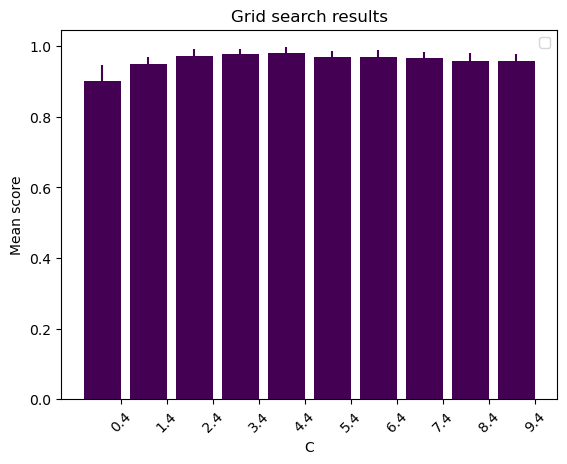

In [120]:
ax = plot.grid_search(lr_d2_clf.cv_results_, change='C', kind='bar')
ax.set_xticklabels(ax.get_xticks(), rotation = 45)

In [121]:
rf_d2_clf = tune_random_forest(X2,Y2)
rf_d2_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 200}

In [122]:
rf_d2_clf

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='accuracy')

<AxesSubplot:>

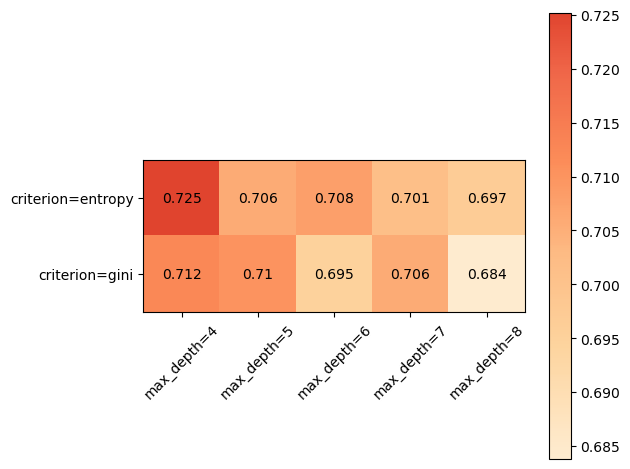

In [123]:
plot.grid_search(rf_d2_clf.cv_results_, change=('criterion', 'max_depth'), subset= {'max_features':'log2', 'n_estimators':200})

<AxesSubplot:>

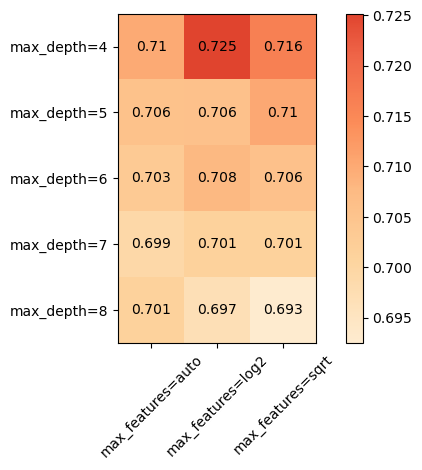

In [124]:
plot.grid_search(rf_d2_clf.cv_results_, change=('max_depth', 'max_features'), subset= {'criterion':'entropy', 'n_estimators':200})

<AxesSubplot:>

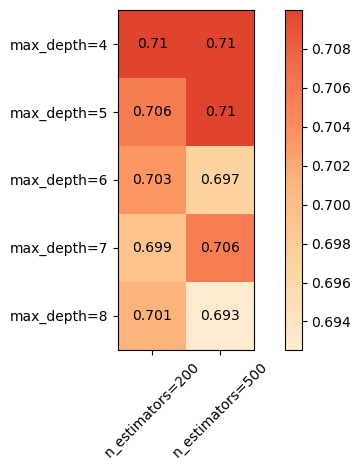

In [125]:
plot.grid_search(rf_d2_clf.cv_results_, change=('n_estimators', 'max_depth'), subset= {'criterion':'entropy', 'max_features':'auto'})

In [126]:
knn_d2_clf = tune_knn(X2,Y2)
knn_d2_clf.best_params_

{'n_neighbors': 25}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0.4, 0, '0.4'),
 Text(1.4, 0, '1.4'),
 Text(2.4, 0, '2.4'),
 Text(3.4, 0, '3.4'),
 Text(4.4, 0, '4.4'),
 Text(5.4, 0, '5.4'),
 Text(6.4, 0, '6.4'),
 Text(7.4, 0, '7.4'),
 Text(8.4, 0, '8.4'),
 Text(9.4, 0, '9.4'),
 Text(10.4, 0, '10.4'),
 Text(11.4, 0, '11.4'),
 Text(12.4, 0, '12.4'),
 Text(13.4, 0, '13.4'),
 Text(14.4, 0, '14.4'),
 Text(15.4, 0, '15.4'),
 Text(16.4, 0, '16.4'),
 Text(17.4, 0, '17.4'),
 Text(18.4, 0, '18.4'),
 Text(19.4, 0, '19.4'),
 Text(20.4, 0, '20.4'),
 Text(21.4, 0, '21.4'),
 Text(22.4, 0, '22.4'),
 Text(23.4, 0, '23.4'),
 Text(24.4, 0, '24.4'),
 Text(25.4, 0, '25.4'),
 Text(26.4, 0, '26.4'),
 Text(27.4, 0, '27.4'),
 Text(28.4, 0, '28.4'),
 Text(29.4, 0, '29.4')]

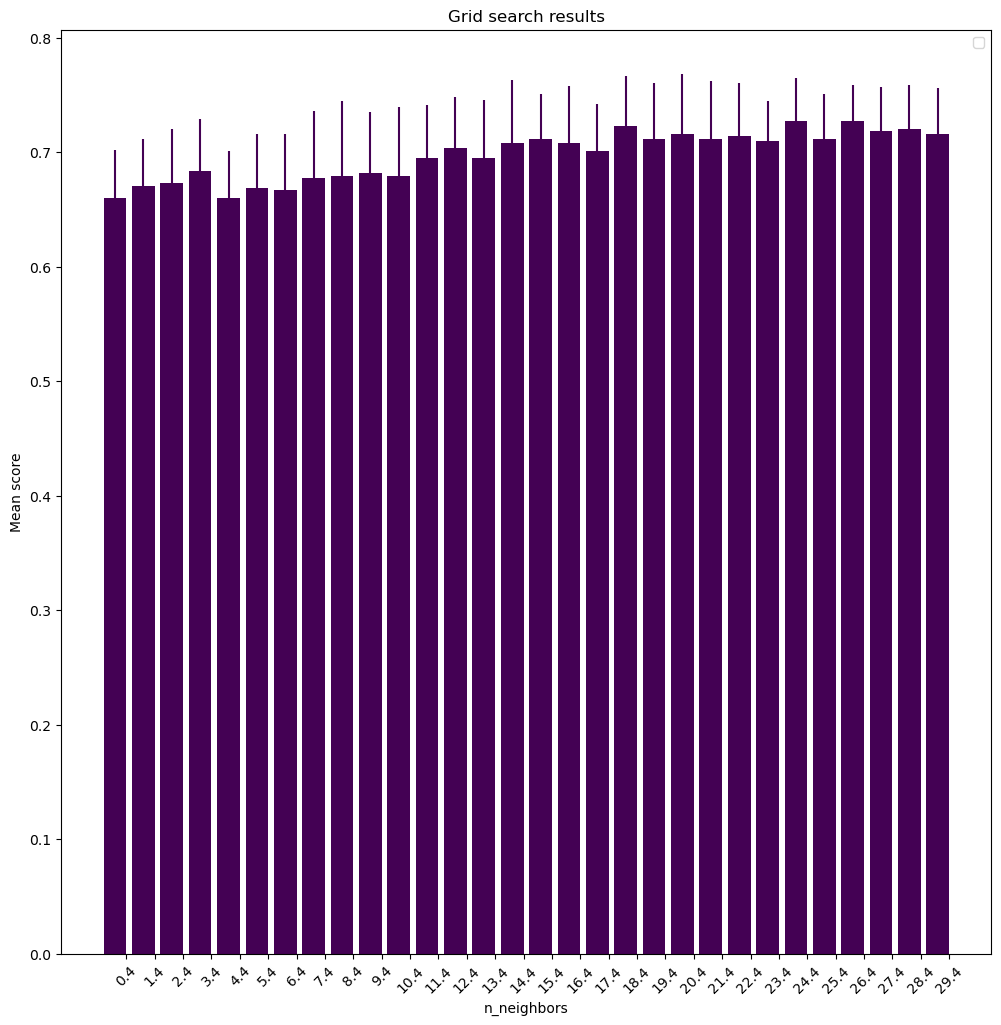

In [127]:
plt.figure(figsize=(12,12))
ax = plot.grid_search(knn_d2_clf.cv_results_, change='n_neighbors',kind='bar')
ax.set_xticklabels(ax.get_xticks(), rotation = 45)

In [128]:
dt_d2_clf = tune_decision_tree(X2,Y2)
dt_d2_clf.best_params_

{'max_leaf_nodes': 6, 'min_samples_split': 2}

<AxesSubplot:>

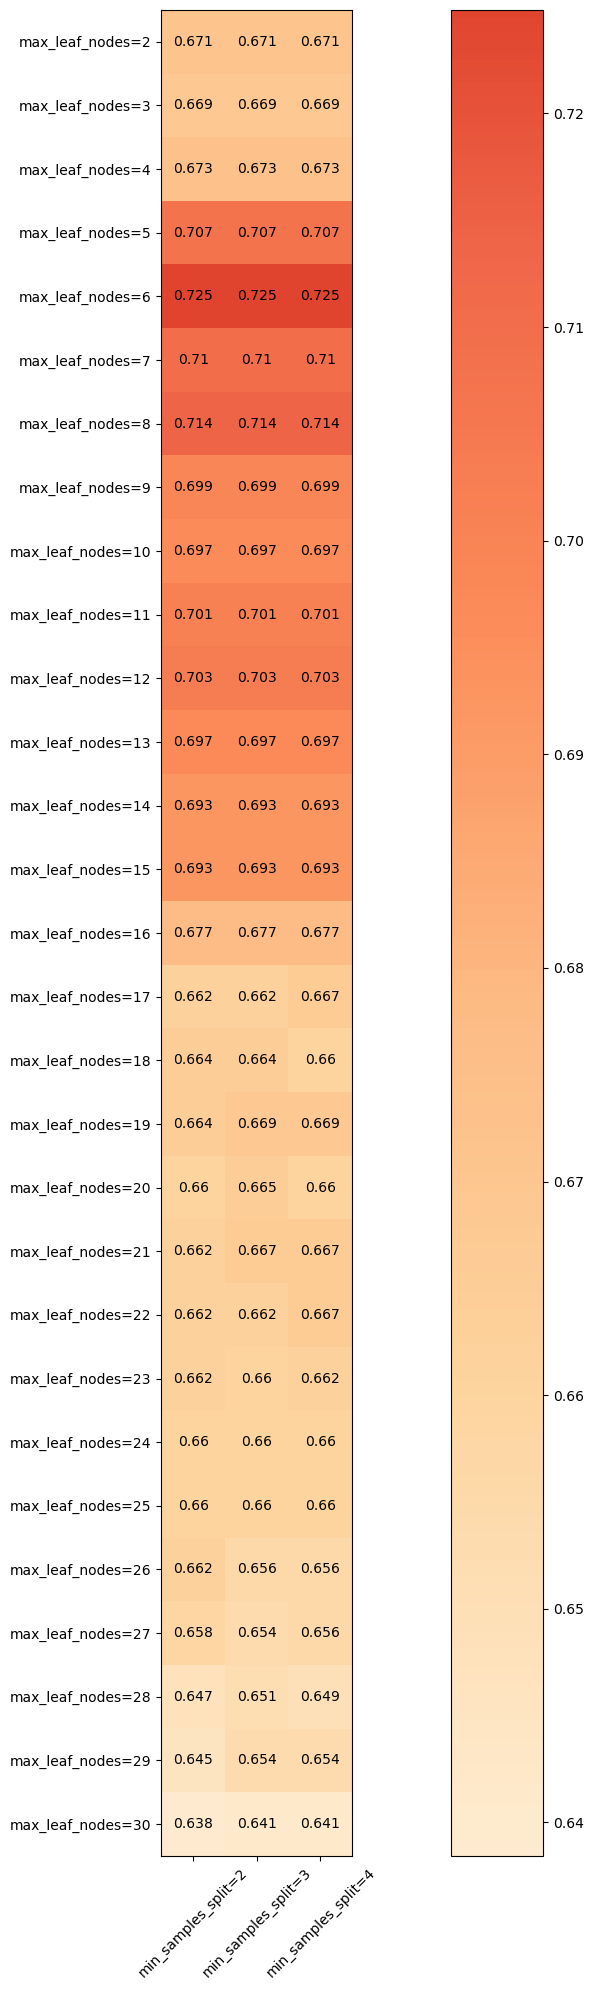

In [129]:
plt.figure(figsize=(20,20))
plot.grid_search(dt_d2_clf.cv_results_, change=('min_samples_split', 'max_leaf_nodes'))

#### Model Definitions

In [159]:
def svm(X,Y,C, kernel):
    clf = SVC(C=C, kernel=kernel)
    cv_results = cross_validate(clf, X,Y.values.ravel(), cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)
    return cv_results

In [160]:
def adaboost(X,Y, n_estimators):
    clf = AdaBoostClassifier(n_estimators=n_estimators, random_state=0)
    clf = clf.fit(X, Y.values.ravel())
    cv_results = cross_validate(clf, X,Y.values.ravel(), cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)
    return cv_results

In [161]:
def logistic_regression(X,y,reg_param, max_iter=100):
    # all parameters not specified are set to their defaults
    if(reg_param > 0):
        logisticRegr = LogisticRegression(penalty="l2",C=reg_param, max_iter=max_iter)
    else:
        logisticRegr = LogisticRegression(penalty="none", max_iter=max_iter) # default l2 reg param 
        
    scaler = preprocessing.StandardScaler().fit(X)
    x_scaled = scaler.transform(X)
    cv_results = cross_validate(logisticRegr, x_scaled,y.values.ravel(), cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)
    return cv_results

In [162]:
# TODO: Can I use the sklearn implementation? Or should I use the decision tree classifier to create custom random forest methodß
def random_forest(X,y, criterion, max_depth, max_features, n_estimators):
    clf = RandomForestClassifier(max_depth=max_depth, random_state=0, criterion=criterion,
                                 max_features=max_features,n_estimators=n_estimators )
    cv_results = cross_validate(clf, X,y.values.ravel(), cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)
    return cv_results

In [163]:
def knn(X,y,k):
    
    scaler = preprocessing.StandardScaler().fit(X)
    x_scaled = scaler.transform(X)
    #x_scaled_test = scaler.transform(x_test)
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    cv_results = cross_validate(knn, x_scaled,y.values.ravel(), cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)
    return cv_results

In [164]:
def decision_tree(X,y, max_leaf_nodes, min_samples_split):
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=13, min_samples_split=3)
    cv_results = cross_validate(clf, X,y, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)
    return cv_results

#### DataSet 1 Training and Evaluation

In [165]:
warnings.filterwarnings('ignore')
lr_d1 = logistic_regression(X,Y,3.59,1000)
lr_d1

{'fit_time': array([0.05662489, 0.0086031 , 0.00767207, 0.00769019, 0.00902987,
        0.00772786, 0.00694203, 0.00665808, 0.00794792, 0.00703192]),
 'score_time': array([0.01240802, 0.00188971, 0.00184822, 0.00179601, 0.00179791,
        0.00353408, 0.00209188, 0.0018189 , 0.00178218, 0.00208187]),
 'test_accuracy': array([0.98245614, 1.        , 1.        , 0.98245614, 0.96491228,
        0.98245614, 0.94736842, 0.98245614, 0.96491228, 1.        ]),
 'train_accuracy': array([0.9921875 , 0.98828125, 0.98828125, 0.9921875 , 0.98632812,
        0.9921875 , 0.99023438, 0.99023438, 0.99023438, 0.98830409]),
 'test_precision': array([0.95652174, 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.90909091, 1.        , 0.95238095, 1.        ]),
 'train_precision': array([1.        , 0.99462366, 0.99465241, 1.        , 0.99462366,
        1.        , 0.99468085, 0.98947368, 0.99468085, 0.99465241]),
 'test_recall': array([1.        , 1.        , 1.        , 0.95238095, 0.9

In [166]:
knn_d1 = knn(X,Y,11) # 1 neighbor would give perfect accuracy for training set, overfitting
knn_d1

{'fit_time': array([0.00212479, 0.0003109 , 0.00029492, 0.00026298, 0.00053406,
        0.00027823, 0.00027084, 0.00026703, 0.00025272, 0.00026488]),
 'score_time': array([0.0206089 , 0.00604415, 0.00454021, 0.00566292, 0.00447774,
        0.00414586, 0.00480533, 0.00455904, 0.00560308, 0.00711608]),
 'test_accuracy': array([0.98245614, 0.96491228, 0.98245614, 0.92982456, 0.96491228,
        0.98245614, 0.98245614, 0.96491228, 0.98245614, 0.98214286]),
 'train_accuracy': array([0.97265625, 0.97070312, 0.97070312, 0.9765625 , 0.97265625,
        0.97265625, 0.97265625, 0.97070312, 0.97460938, 0.97270955]),
 'test_precision': array([1.        , 0.95454545, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.95454545]),
 'train_precision': array([0.98351648, 0.99435028, 0.98888889, 0.98907104, 0.98895028,
        0.98895028, 0.98895028, 0.98888889, 0.98901099, 0.99441341]),
 'test_recall': array([0.95454545, 0.95454545, 0.95238095, 0.80952381, 0.9

In [167]:
dt_d1 = decision_tree(X,Y, max_leaf_nodes=13, min_samples_split=3)
dt_d1

{'fit_time': array([0.02335691, 0.00835896, 0.0056901 , 0.00657201, 0.00567293,
        0.00508714, 0.00557685, 0.00511312, 0.00563502, 0.00477529]),
 'score_time': array([0.00578403, 0.00494576, 0.00435686, 0.00398016, 0.003227  ,
        0.00354886, 0.003124  , 0.00312805, 0.00311399, 0.00314283]),
 'test_accuracy': array([0.94736842, 0.87719298, 0.98245614, 0.89473684, 0.94736842,
        0.9122807 , 0.92982456, 0.92982456, 0.96491228, 0.94642857]),
 'train_accuracy': array([0.98828125, 0.98828125, 0.9921875 , 0.9921875 , 0.99023438,
        0.99414062, 0.9921875 , 0.99023438, 0.98828125, 0.99415205]),
 'test_precision': array([0.95238095, 0.82608696, 1.        , 0.94117647, 0.95      ,
        0.86363636, 0.94736842, 0.9047619 , 1.        , 0.90909091]),
 'train_precision': array([0.9893617 , 0.99462366, 1.        , 0.99470899, 1.        ,
        1.        , 0.99470899, 0.98947368, 0.98941799, 1.        ]),
 'test_recall': array([0.90909091, 0.86363636, 0.95238095, 0.76190476, 0.9

In [168]:
svm_d1 = svm(X,Y,1, 'linear')
svm_d1

{'fit_time': array([1.22865629, 1.90304804, 0.59330726, 0.68369889, 0.60262394,
        1.64845085, 0.50802326, 0.45325089, 0.86749387, 0.50328803]),
 'score_time': array([0.0057919 , 0.00363588, 0.0035131 , 0.00371003, 0.00349498,
        0.00334907, 0.00349998, 0.00353909, 0.00341892, 0.00470686]),
 'test_accuracy': array([0.9122807 , 0.96491228, 0.98245614, 0.9122807 , 0.9122807 ,
        0.96491228, 0.9122807 , 0.98245614, 1.        , 0.98214286]),
 'train_accuracy': array([0.96679688, 0.96289062, 0.97265625, 0.96875   , 0.97070312,
        0.96679688, 0.96875   , 0.96679688, 0.9609375 , 0.96491228]),
 'test_precision': array([0.84, 1.  , 1.  , 0.9 , 0.9 , 1.  , 0.9 , 1.  , 1.  , 1.  ]),
 'train_precision': array([0.96756757, 0.96721311, 0.97326203, 0.96296296, 0.97826087,
        0.95789474, 0.96791444, 0.96276596, 0.96216216, 0.96756757]),
 'test_recall': array([0.95454545, 0.90909091, 0.95238095, 0.85714286, 0.85714286,
        0.9047619 , 0.85714286, 0.95238095, 1.        , 0.9

In [169]:
#adaboost(x_train,x_test,y_train,y_test)
adaboost_d1 = adaboost(X,Y, 300)
adaboost_d1

{'fit_time': array([0.50644898, 0.51507092, 0.50337791, 0.50705314, 0.50841594,
        0.5051682 , 0.50730491, 0.51092482, 0.50558782, 0.50619173]),
 'score_time': array([0.0413599 , 0.03954196, 0.03951311, 0.03962088, 0.04014587,
        0.0395999 , 0.04025292, 0.03967714, 0.03957605, 0.03947806]),
 'test_accuracy': array([0.96491228, 0.98245614, 0.98245614, 0.92982456, 0.96491228,
        0.96491228, 0.98245614, 0.96491228, 0.98245614, 0.96428571]),
 'train_accuracy': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_precision': array([0.95454545, 1.        , 1.        , 0.94736842, 1.        ,
        0.95238095, 1.        , 1.        , 1.        , 0.91304348]),
 'train_precision': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_recall': array([0.95454545, 0.95454545, 0.95238095, 0.85714286, 0.9047619 ,
        0.95238095, 0.95238095, 0.9047619 , 0.95238095, 1.        ]),
 'train_recall': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_f1': array([0.95454545, 

In [170]:
#random_forest(x_train,x_test,y_train,y_test)
rf_d1 = random_forest(X,Y, 'gini', 5, 'sqrt', 500)
rf_d1

{'fit_time': array([0.5601418 , 0.54518795, 0.5330739 , 0.52892184, 0.59085989,
        0.53139091, 0.52966189, 0.5264194 , 0.53363705, 0.539639  ]),
 'score_time': array([0.04757929, 0.04682302, 0.04470491, 0.04611516, 0.04500031,
        0.04498577, 0.04442811, 0.04453874, 0.04471588, 0.04688478]),
 'test_accuracy': array([0.96491228, 0.96491228, 0.98245614, 0.92982456, 0.96491228,
        0.96491228, 0.96491228, 0.98245614, 0.98245614, 0.94642857]),
 'train_accuracy': array([0.99414062, 0.99023438, 0.99414062, 0.99414062, 0.99414062,
        0.99414062, 0.99609375, 0.99609375, 0.99414062, 0.99415205]),
 'test_precision': array([0.95454545, 0.95454545, 1.        , 0.94736842, 1.        ,
        0.95238095, 1.        , 1.        , 1.        , 0.90909091]),
 'train_precision': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_recall': array([0.95454545, 0.95454545, 0.95238095, 0.85714286, 0.9047619 ,
        0.95238095, 0.9047619 , 0.95238095, 0.95238095, 0.95238095]),
 'train_r

#### DataSet 2 Training and Evaluation

In [171]:
warnings.filterwarnings('ignore')
lr_d2 = logistic_regression(X2,Y2,0.0599,1000)
lr_d2

{'fit_time': array([0.00506282, 0.00283098, 0.00209308, 0.00228786, 0.00240588,
        0.00231695, 0.00245714, 0.00219798, 0.00232601, 0.00185084]),
 'score_time': array([0.00333714, 0.00277209, 0.00239801, 0.00270891, 0.00230026,
        0.00227308, 0.00222588, 0.002249  , 0.00205779, 0.00183916]),
 'test_accuracy': array([0.74468085, 0.70212766, 0.80434783, 0.73913043, 0.67391304,
        0.73913043, 0.80434783, 0.73913043, 0.67391304, 0.7173913 ]),
 'train_accuracy': array([0.75180723, 0.74457831, 0.73798077, 0.74038462, 0.75240385,
        0.76442308, 0.73798077, 0.74519231, 0.74759615, 0.74038462]),
 'test_precision': array([0.6       , 0.58333333, 0.81818182, 0.625     , 0.54545455,
        0.75      , 1.        , 0.64285714, 0.54545455, 0.63636364]),
 'train_precision': array([0.68807339, 0.67272727, 0.66666667, 0.67307692, 0.69158879,
        0.70909091, 0.65765766, 0.67592593, 0.67256637, 0.66071429]),
 'test_recall': array([0.75  , 0.4375, 0.5625, 0.625 , 0.375 , 0.375 , 0.4

In [172]:
knn_d2 = knn(X2,Y2,25) # 1 neighbor would give perfect accuracy for training set, overfitting
knn_d2

{'fit_time': array([0.00872302, 0.00048113, 0.00045705, 0.00039196, 0.00033998,
        0.00033712, 0.00033998, 0.00033188, 0.00033307, 0.00036001]),
 'score_time': array([0.01009107, 0.00463891, 0.00451589, 0.00363183, 0.00352502,
        0.00352716, 0.00355792, 0.00350904, 0.00348401, 0.00357294]),
 'test_accuracy': array([0.70212766, 0.72340426, 0.7826087 , 0.73913043, 0.7173913 ,
        0.67391304, 0.7173913 , 0.80434783, 0.69565217, 0.7173913 ]),
 'train_accuracy': array([0.75421687, 0.75662651, 0.73076923, 0.75240385, 0.73798077,
        0.75480769, 0.74759615, 0.73557692, 0.75721154, 0.75      ]),
 'test_precision': array([0.57142857, 0.63636364, 0.875     , 0.64285714, 0.66666667,
        0.66666667, 0.8       , 0.81818182, 0.625     , 0.66666667]),
 'train_precision': array([0.76923077, 0.7654321 , 0.73529412, 0.75308642, 0.72727273,
        0.72826087, 0.70967742, 0.68888889, 0.75294118, 0.75641026]),
 'test_recall': array([0.5   , 0.4375, 0.4375, 0.5625, 0.375 , 0.125 , 0.2

In [173]:
dt_d2 = decision_tree(X2,Y2, max_leaf_nodes=6, min_samples_split=2)
dt_d2

{'fit_time': array([0.02570224, 0.00325108, 0.00263405, 0.00208902, 0.0020349 ,
        0.00199509, 0.00190496, 0.00188494, 0.00194001, 0.00189114]),
 'score_time': array([0.02209783, 0.00636625, 0.00598216, 0.00315905, 0.00336814,
        0.00311399, 0.00322509, 0.00318694, 0.00309086, 0.00312805]),
 'test_accuracy': array([0.68085106, 0.72340426, 0.7173913 , 0.67391304, 0.63043478,
        0.69565217, 0.73913043, 0.73913043, 0.67391304, 0.69565217]),
 'train_accuracy': array([0.81204819, 0.79759036, 0.80288462, 0.79807692, 0.81009615,
        0.81971154, 0.80528846, 0.80288462, 0.80048077, 0.79326923]),
 'test_precision': array([0.52631579, 0.57894737, 0.6       , 0.53846154, 0.47058824,
        0.66666667, 0.7       , 0.64285714, 0.53846154, 0.57142857]),
 'train_precision': array([0.78448276, 0.69736842, 0.76271186, 0.80612245, 0.73049645,
        0.83495146, 0.75609756, 0.73484848, 0.74796748, 0.75438596]),
 'test_recall': array([0.625 , 0.6875, 0.5625, 0.4375, 0.5   , 0.25  , 0.4

In [133]:
svm_d2 = svm(X2,Y2,1, 'linear')
svm_d2

{'fit_time': array([0.14913893, 0.15603304, 0.16219616, 0.10626626, 0.14726114,
        0.11603308, 0.10352206, 0.10992503, 0.15249515, 0.14086032]),
 'score_time': array([0.004807  , 0.00411701, 0.00360394, 0.00345397, 0.00349498,
        0.00342393, 0.0037539 , 0.00345492, 0.0035007 , 0.00375199]),
 'test_accuracy': array([0.72340426, 0.74468085, 0.73913043, 0.76086957, 0.65217391,
        0.7173913 , 0.76086957, 0.73913043, 0.67391304, 0.73913043]),
 'train_accuracy': array([0.7373494 , 0.7373494 , 0.71634615, 0.74038462, 0.73076923,
        0.73557692, 0.73076923, 0.73317308, 0.74519231, 0.73557692]),
 'test_precision': array([0.57894737, 0.64285714, 0.61111111, 0.66666667, 0.5       ,
        0.71428571, 0.72727273, 0.64285714, 0.54545455, 0.66666667]),
 'train_precision': array([0.65217391, 0.64      , 0.60655738, 0.66071429, 0.63333333,
        0.6440678 , 0.63559322, 0.63636364, 0.64179104, 0.63492063]),
 'test_recall': array([0.6875, 0.5625, 0.6875, 0.625 , 0.375 , 0.3125, 0.5

In [174]:
#adaboost(x_train,x_test,y_train,y_test)
adaboost_d2 = adaboost(X2,Y2, 100)
adaboost_d2

{'fit_time': array([0.08132792, 0.08146906, 0.07866287, 0.07741117, 0.07742596,
        0.07731295, 0.07722425, 0.07961202, 0.07824016, 0.07740331]),
 'score_time': array([0.0169661 , 0.01594496, 0.01524138, 0.01468205, 0.01546693,
        0.01470399, 0.01462102, 0.01509714, 0.01505184, 0.01475286]),
 'test_accuracy': array([0.59574468, 0.63829787, 0.65217391, 0.63043478, 0.52173913,
        0.67391304, 0.69565217, 0.65217391, 0.69565217, 0.67391304]),
 'train_accuracy': array([0.85060241, 0.86506024, 0.85336538, 0.87740385, 0.86298077,
        0.87740385, 0.85336538, 0.84615385, 0.87259615, 0.86538462]),
 'test_precision': array([0.4       , 0.47619048, 0.5       , 0.47368421, 0.28571429,
        0.55555556, 0.58333333, 0.5       , 0.58333333, 0.57142857]),
 'train_precision': array([0.80597015, 0.86065574, 0.82170543, 0.88429752, 0.84251969,
        0.83941606, 0.81203008, 0.78985507, 0.85826772, 0.83846154]),
 'test_recall': array([0.375 , 0.625 , 0.4375, 0.5625, 0.25  , 0.3125, 0.4

In [175]:
#random_forest(x_train,x_test,y_train,y_test)
rf_d2 = random_forest(X2,Y2, 'entropy', 4, 'auto', 200)
rf_d2

{'fit_time': array([0.18778968, 0.16347003, 0.16333795, 0.1634469 , 0.16430783,
        0.16326594, 0.165416  , 0.16367984, 0.16530991, 0.16236806]),
 'score_time': array([0.02052927, 0.01969576, 0.01949072, 0.01968622, 0.01973677,
        0.019768  , 0.02006197, 0.02018905, 0.01995897, 0.01968098]),
 'test_accuracy': array([0.74468085, 0.68085106, 0.76086957, 0.73913043, 0.67391304,
        0.69565217, 0.7173913 , 0.73913043, 0.7173913 , 0.7173913 ]),
 'train_accuracy': array([0.82168675, 0.81445783, 0.80528846, 0.82451923, 0.82211538,
        0.82692308, 0.8125    , 0.80769231, 0.82211538, 0.81730769]),
 'test_precision': array([0.61111111, 0.55555556, 0.72727273, 0.625     , 0.57142857,
        0.66666667, 0.66666667, 0.64285714, 0.71428571, 0.66666667]),
 'train_precision': array([0.84313725, 0.82524272, 0.82474227, 0.85858586, 0.85714286,
        0.84615385, 0.84375   , 0.81372549, 0.84313725, 0.84693878]),
 'test_recall': array([0.6875, 0.3125, 0.5   , 0.625 , 0.25  , 0.25  , 0.3

# Graphs

In [145]:
def get_average(lst):
    return sum(lst) / len(lst)
def create_graph(res_d1, res_d2):
    index = res_d1.keys()
    d1_vals = [get_average(res_d1[metric]) for metric in index]
    d2_vals = [get_average(res_d2[metric]) for metric in index]
    df = pd.DataFrame({'dataset_1': d1_vals,
                   'dataset_2': d2_vals}, index=index)
    #df.plot.bar()
    return df

<AxesSubplot:>

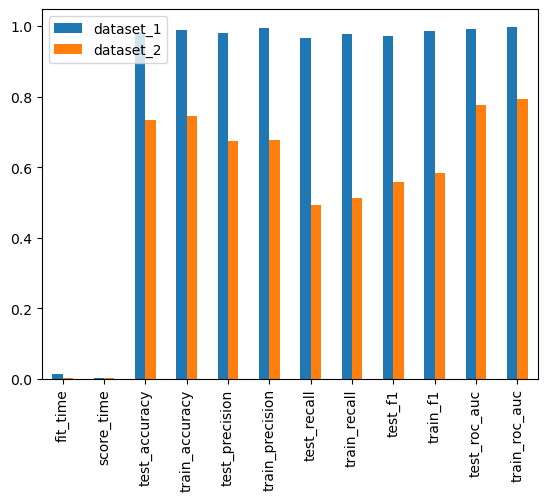

In [176]:
df = create_graph(lr_d1, lr_d2)
df.plot.bar()

<AxesSubplot:>

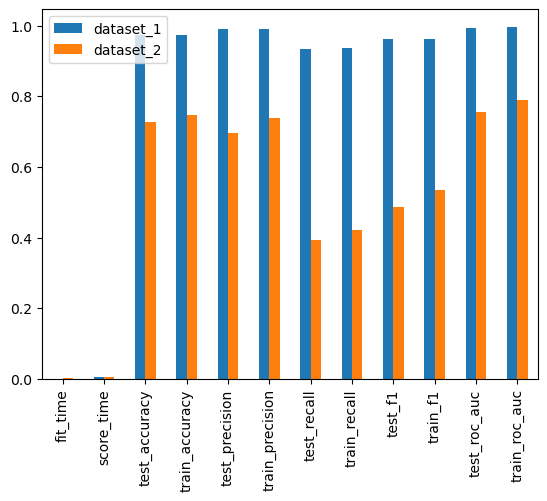

In [177]:
df = create_graph(knn_d1, knn_d2)
df.plot.bar()

<AxesSubplot:>

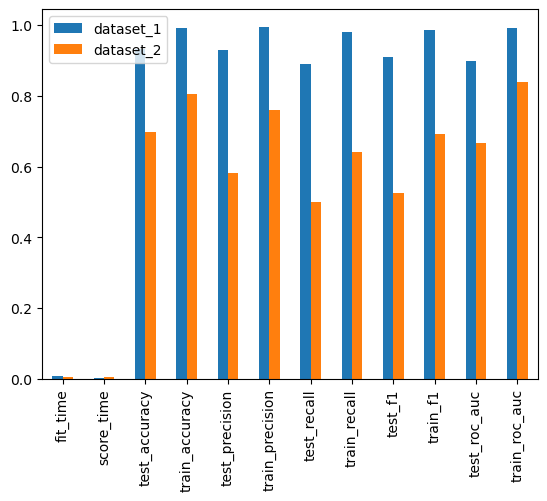

In [178]:
df = create_graph(dt_d1, dt_d2)
df.plot.bar()

<AxesSubplot:>

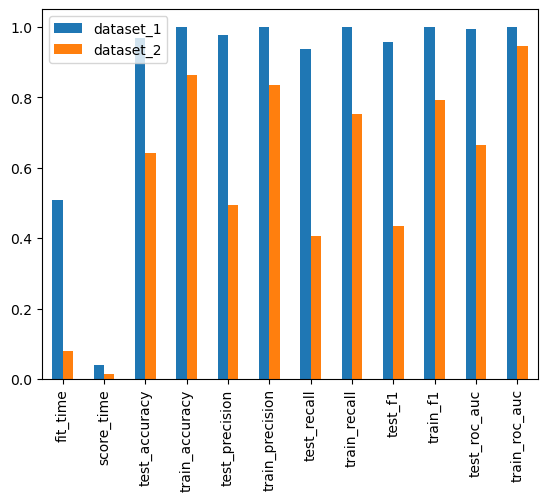

In [179]:
df = create_graph(adaboost_d1, adaboost_d2)
df.plot.bar()

<AxesSubplot:>

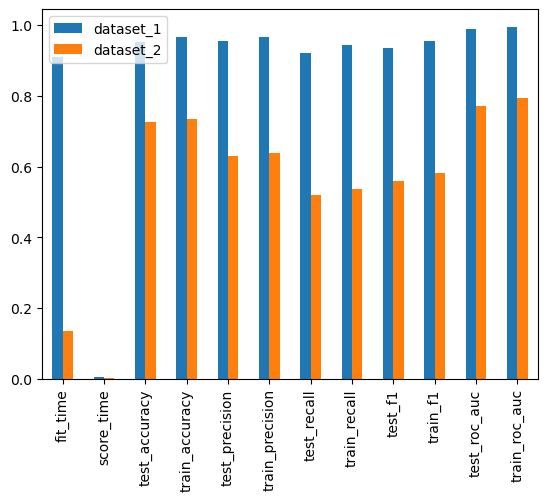

In [146]:
df = create_graph(svm_d1, svm_d2)
df.plot.bar()

<AxesSubplot:>

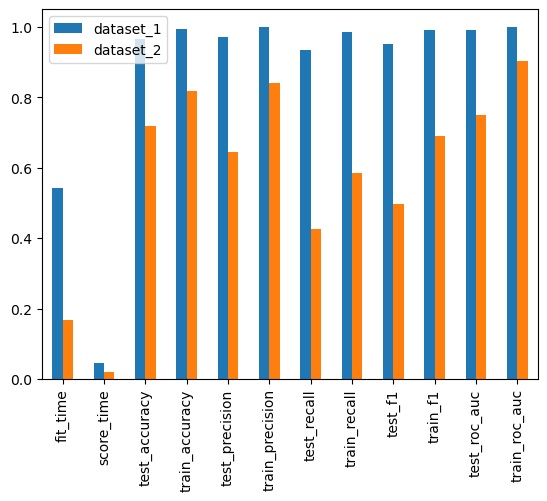

In [180]:
df = create_graph(rf_d1, rf_d2)
df.plot.bar()